In [1]:
import os, sys
import numpy as np
import pickle
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')
from common.save_file import *
from common.config import *
from common.entropy import *

In [2]:
cfg = Config()
dirs = cfg.DIRS
games = cfg.GAMES
entropy_tau = 5.0

def get_path(directory, game):
    var_path = '../' + directory + '/var/' + directory + '_' + game + '.pkl'
    return var_path
    

def get_value(directory, game, tau, val_name):
    var_path = get_path(directory, game)
    
    if not os.path.exists(var_path):
        print('no path exists')
        if val_name == 'all':
            return ([0], [[0]], [[0]], [0], [[0]]) 
        elif val_name == 'all_rewards'or val_name == 'losses':
            return [0]
        else:
            return [[0]]
        
    with open(var_path, 'rb') as f:
        data = pickle.load(f)
    
    if val_name == 'all':
        rewards = data['all_rewards']
        states  = data['state_traj']
        qvalues  = data['q_value_traj']
        losses  = data['losses']
        qentropy = compute_q_entropy(qvalues)
        return (rewards, states, qvalues, losses, qentropy)
    elif val_name == 'qentropy':
        qvalues  = data['q_value_traj']
        return compute_q_entropy(qvalues)
    else:
        val = data[val_name]
        return val

def plot_rewards(game, methods):
    plt.title(game)
    for m in methods:
        plt.plot(methods[m], label=m)
    plt.legend(loc='upper right')

def plot_qentropy(directory, game, q_entropy, divisor=4):
    plt.title(directory + '_' + game)
    if len(q_entropy) > divisor:
        delta_n = len(q_entropy) / divisor
        i = 0
        while i < len(q_entropy):
            i = int(i)
            plt.plot(q_entropy[i], label="episode_" + str(i))
            i += delta_n
        plt.legend(loc='upper right')

<h2> Plot reward by methods </h2>

In [4]:
rewards = {}

for g in games:
    rewards[g] = {}
    for d in dirs:
        reward = get_value(d, g, entropy_tau, 'all_rewards')
        rewards[g][d] = reward


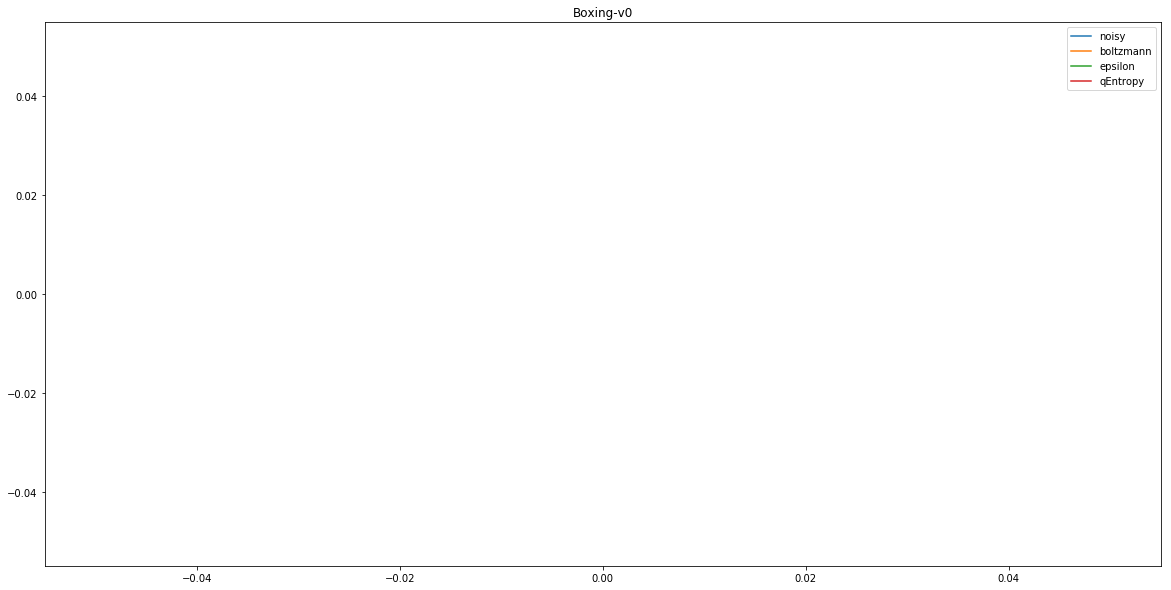

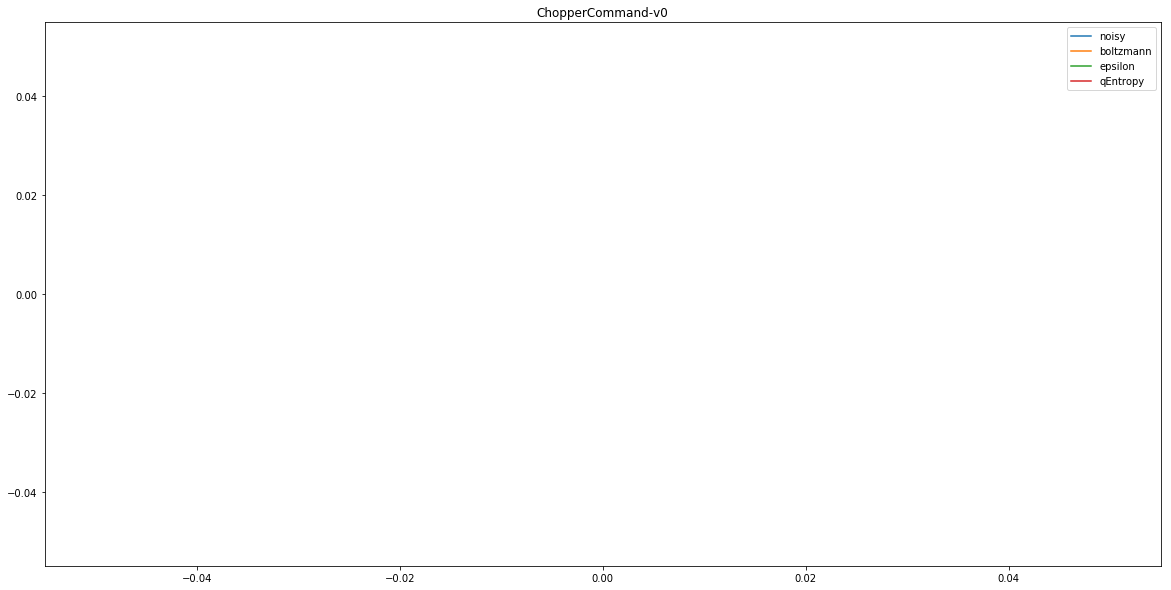

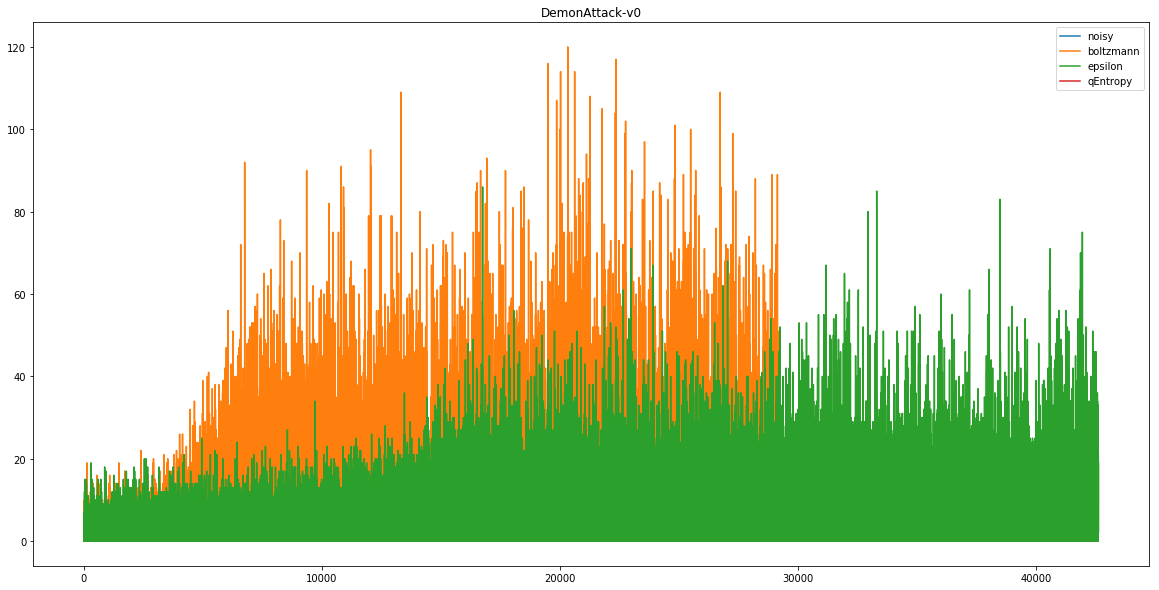

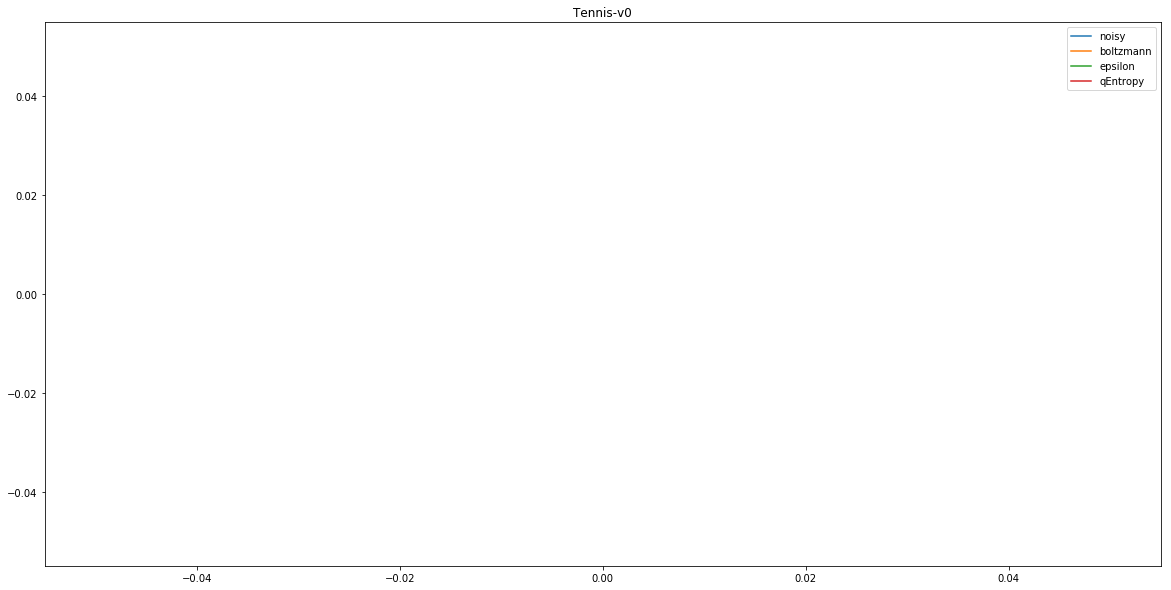

In [5]:
for g in games:
    plt.figure(figsize=[20,10])
    plot_rewards(g, rewards[g])
    plt.show()


<h2>Plot q-entropy by game and method </h2>

no path exists


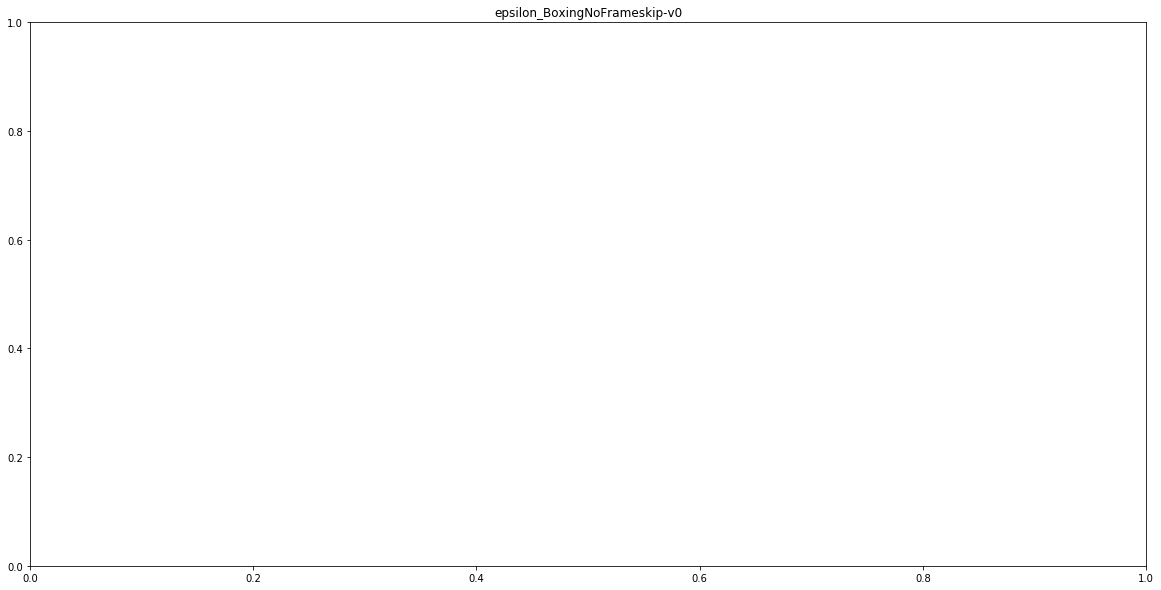

no path exists


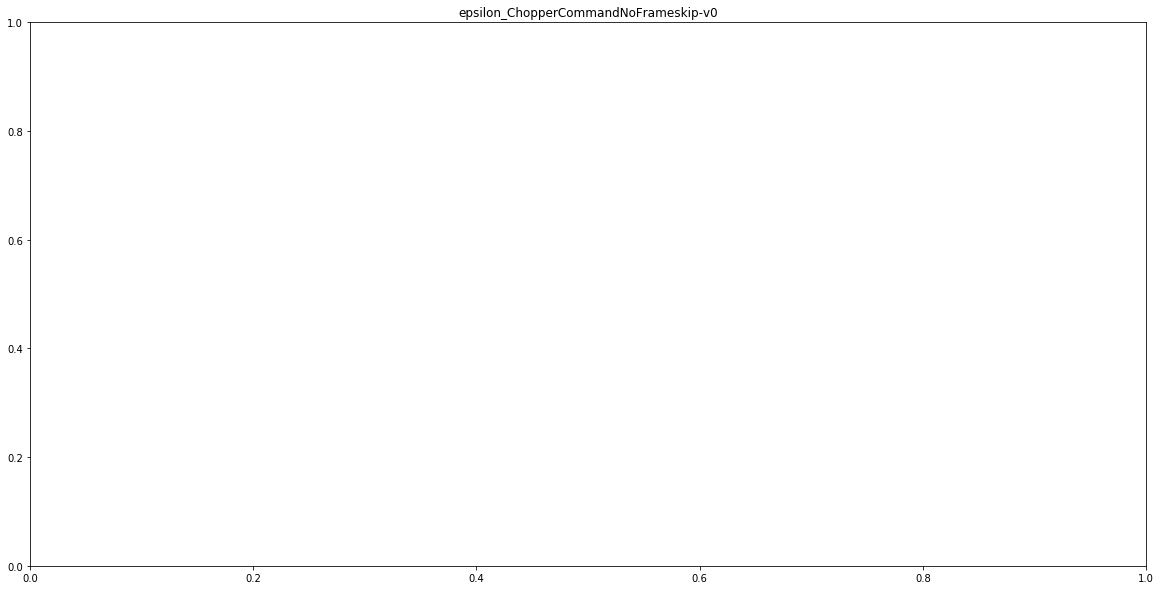

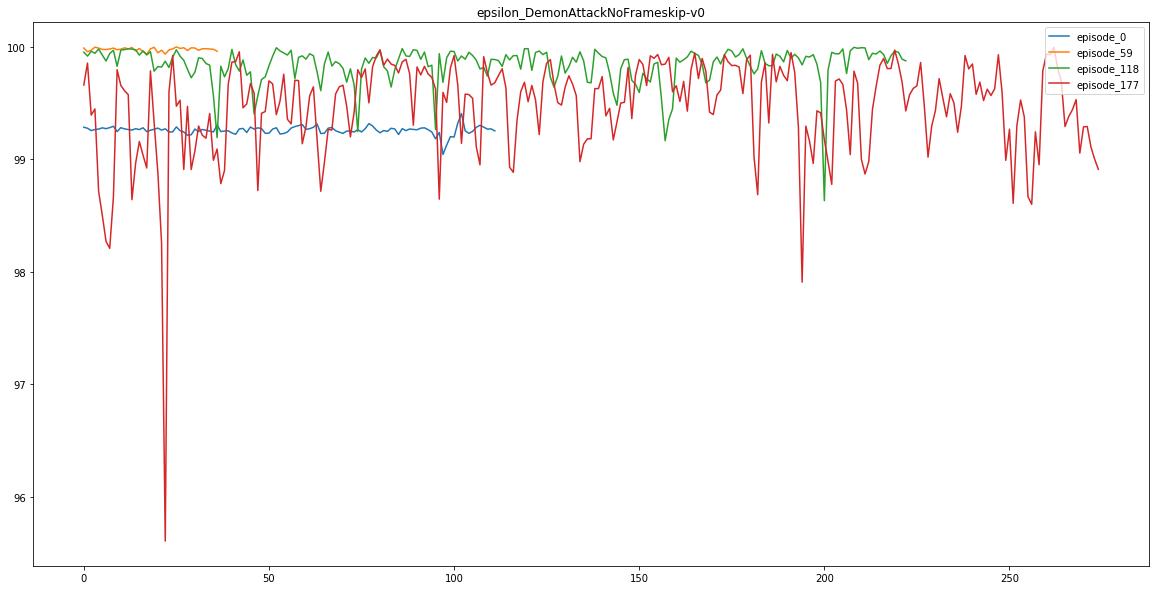

no path exists


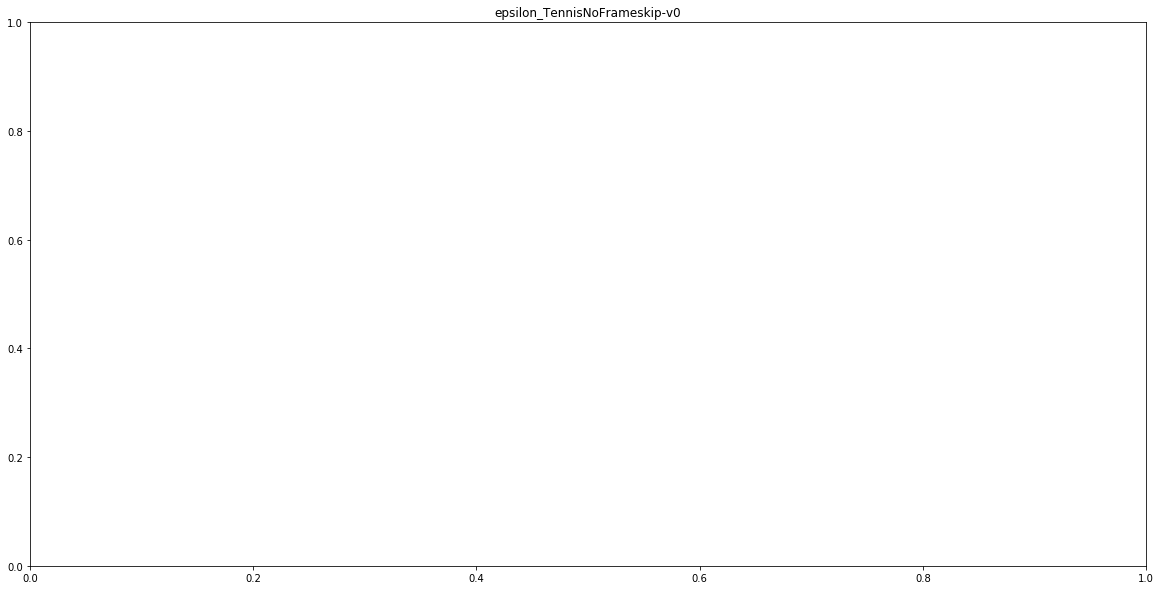

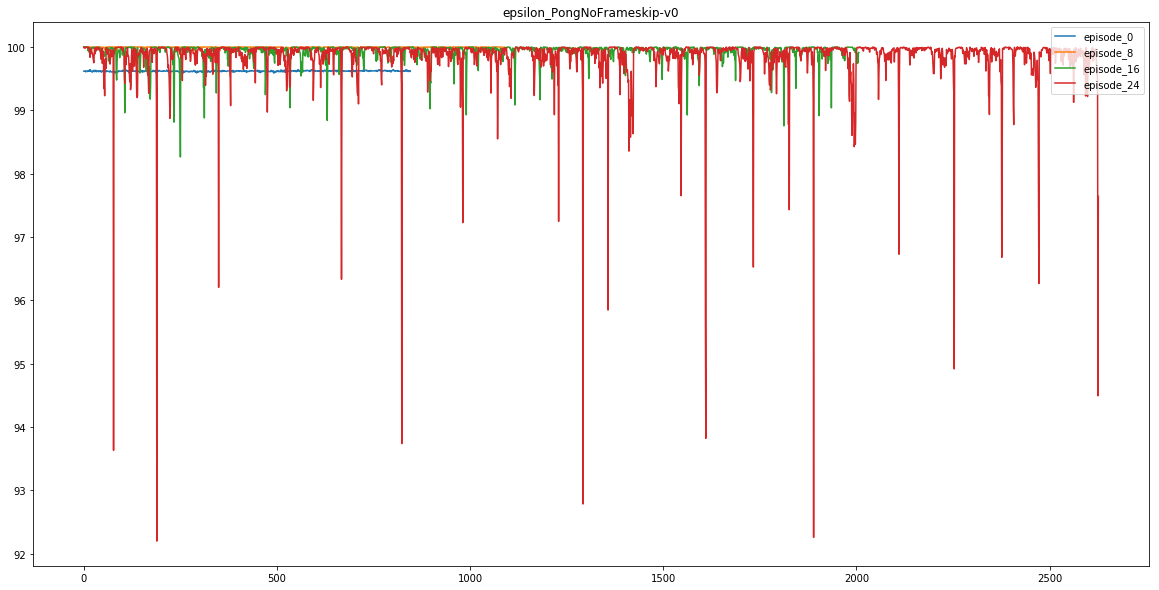

no path exists


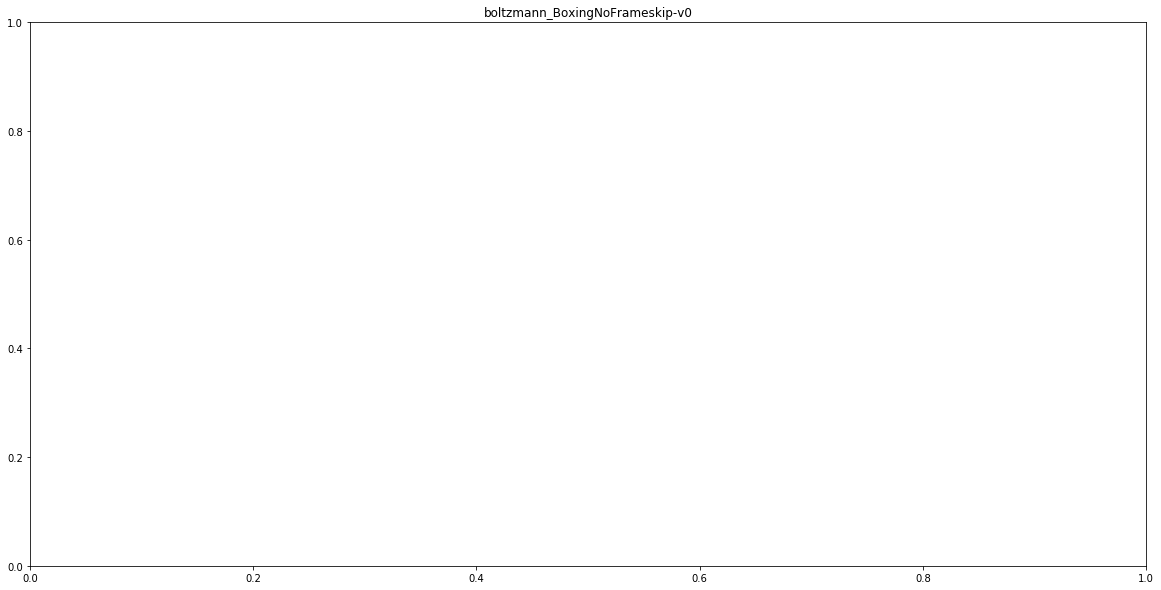

no path exists


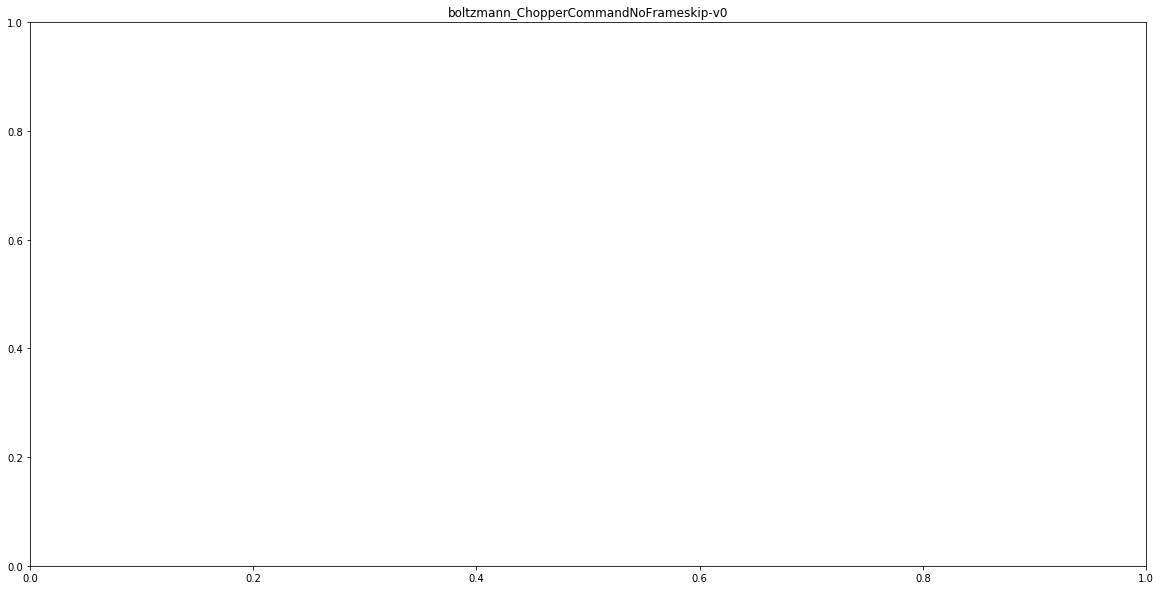

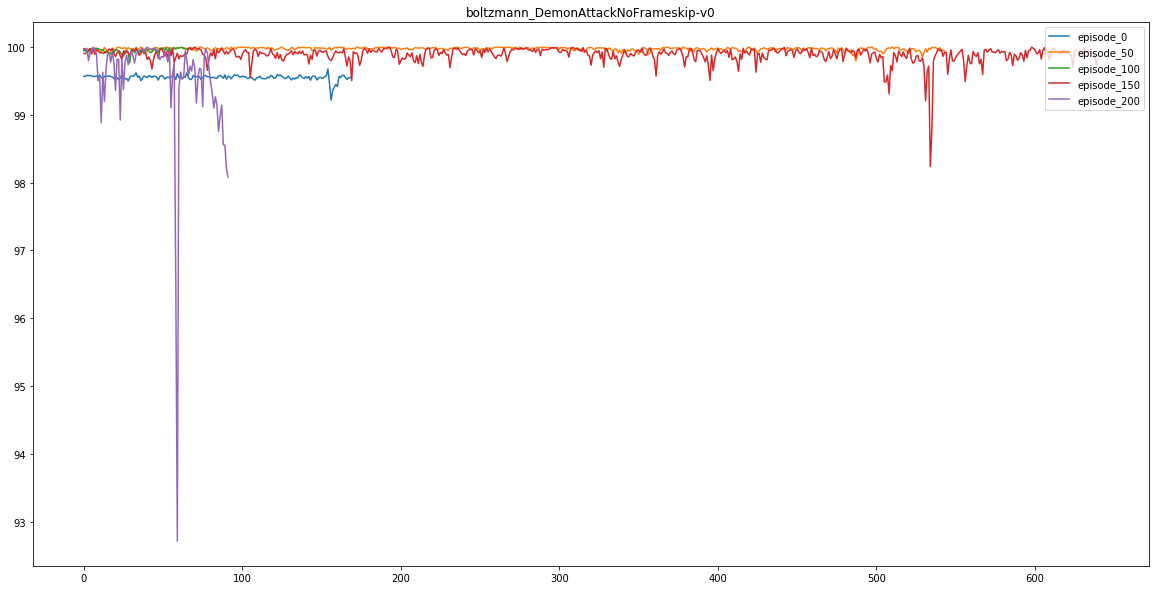

no path exists


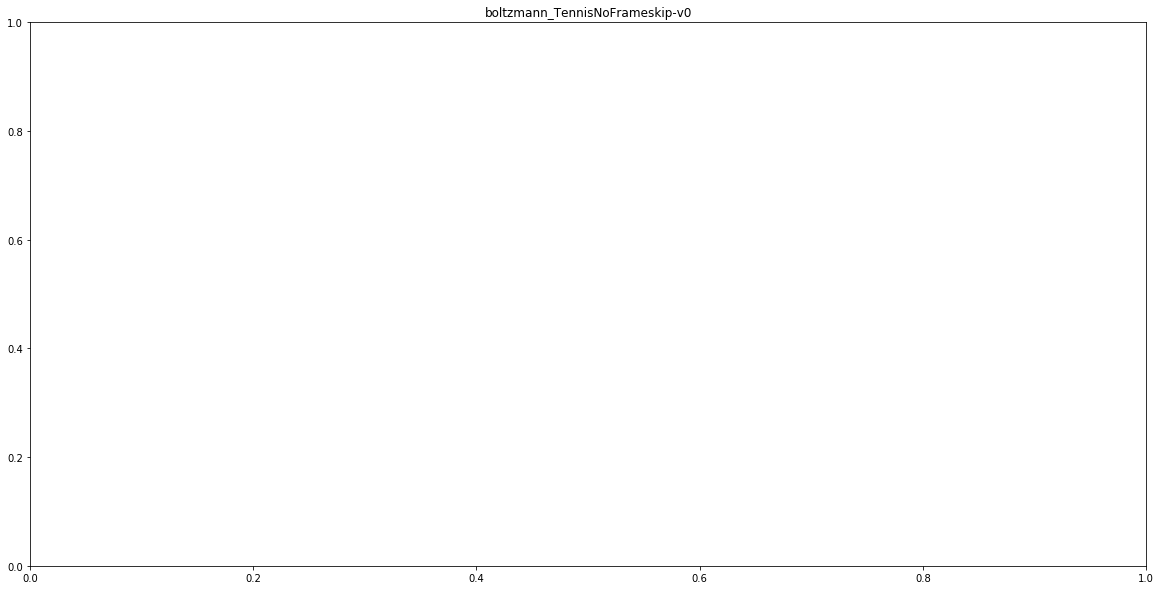

no path exists


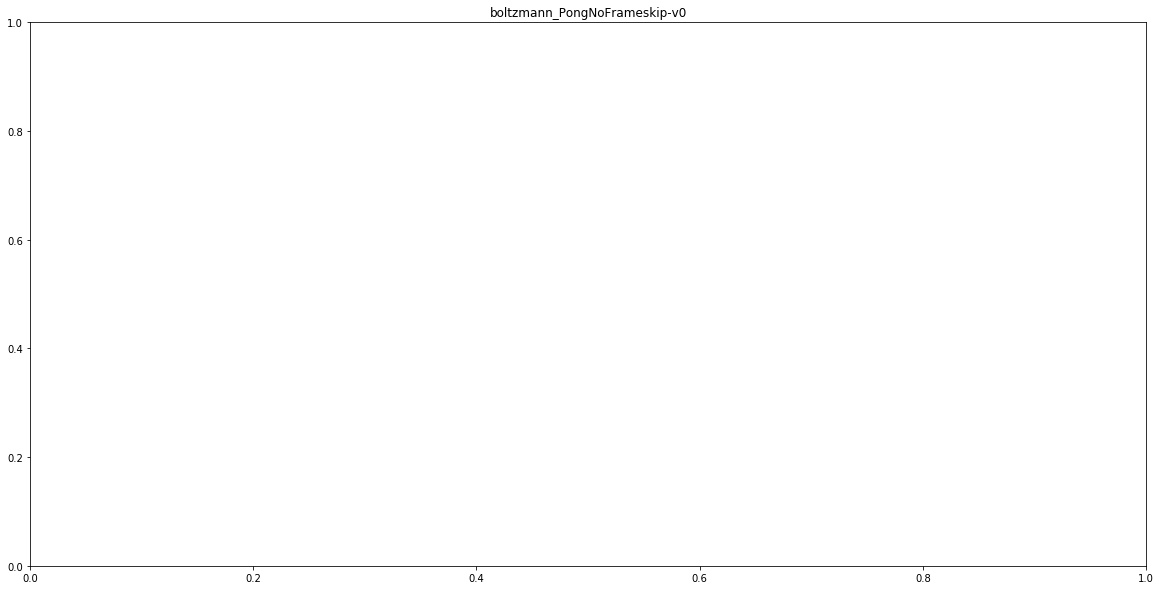

no path exists


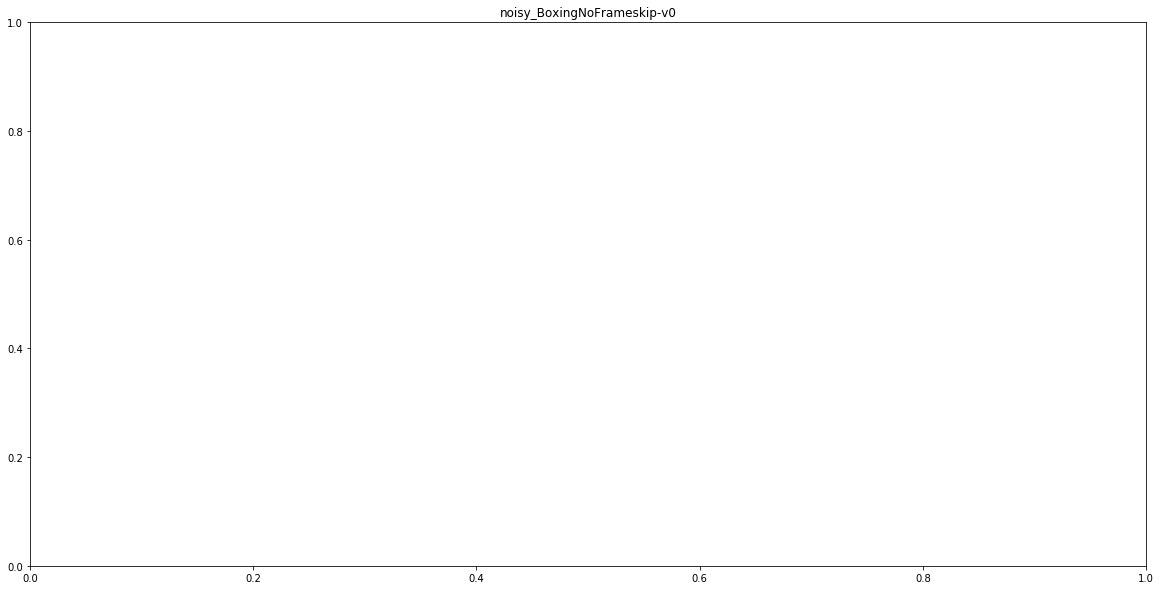

no path exists


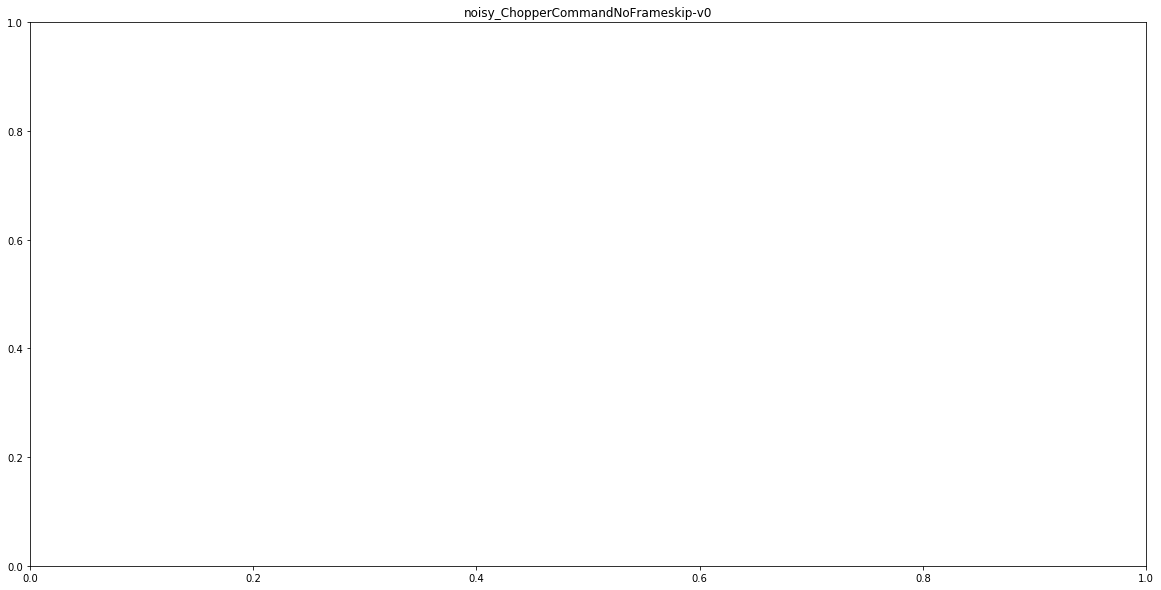

no path exists


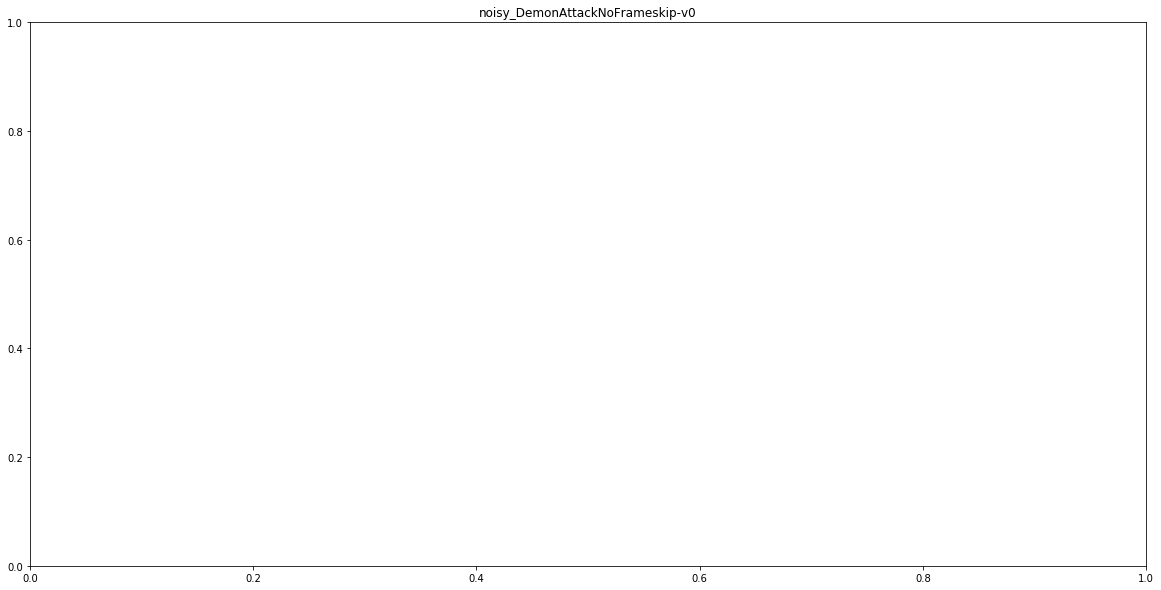

no path exists


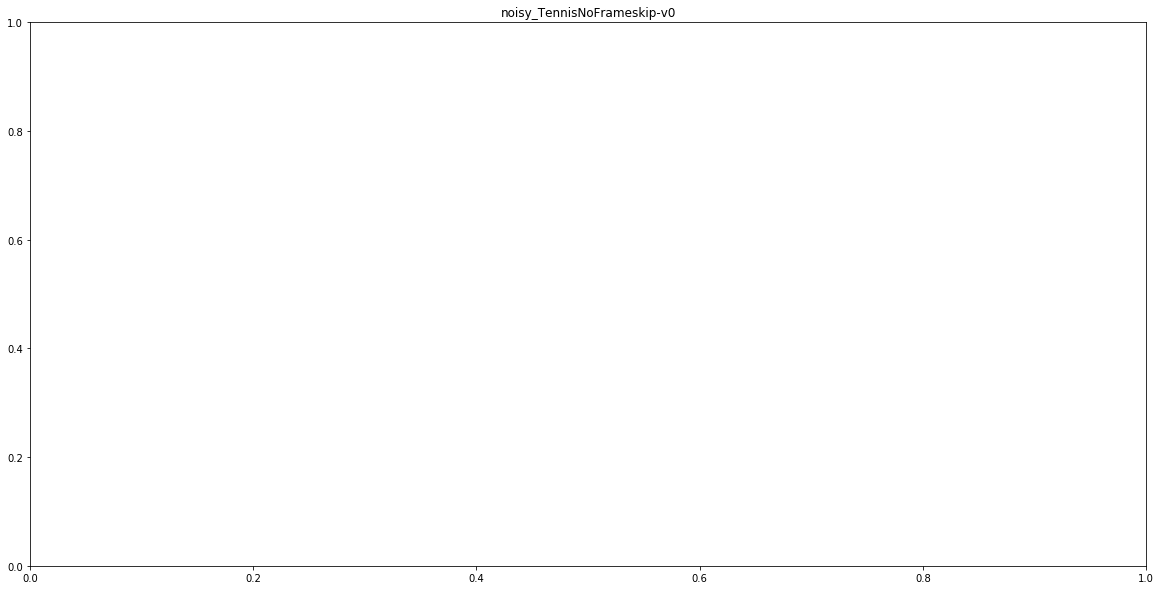

no path exists


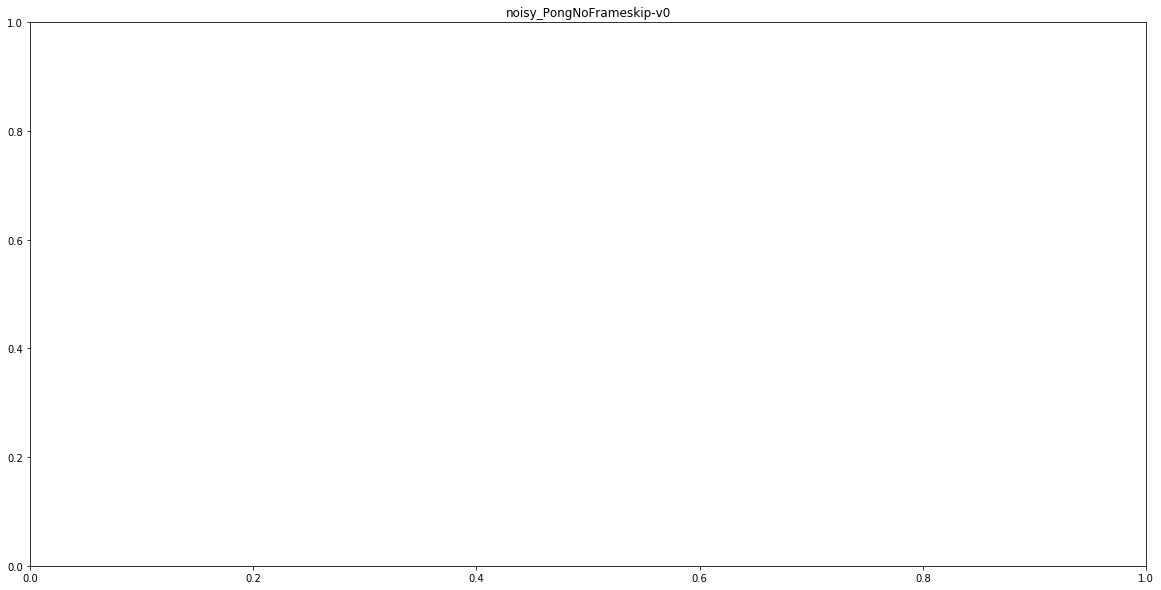

no path exists


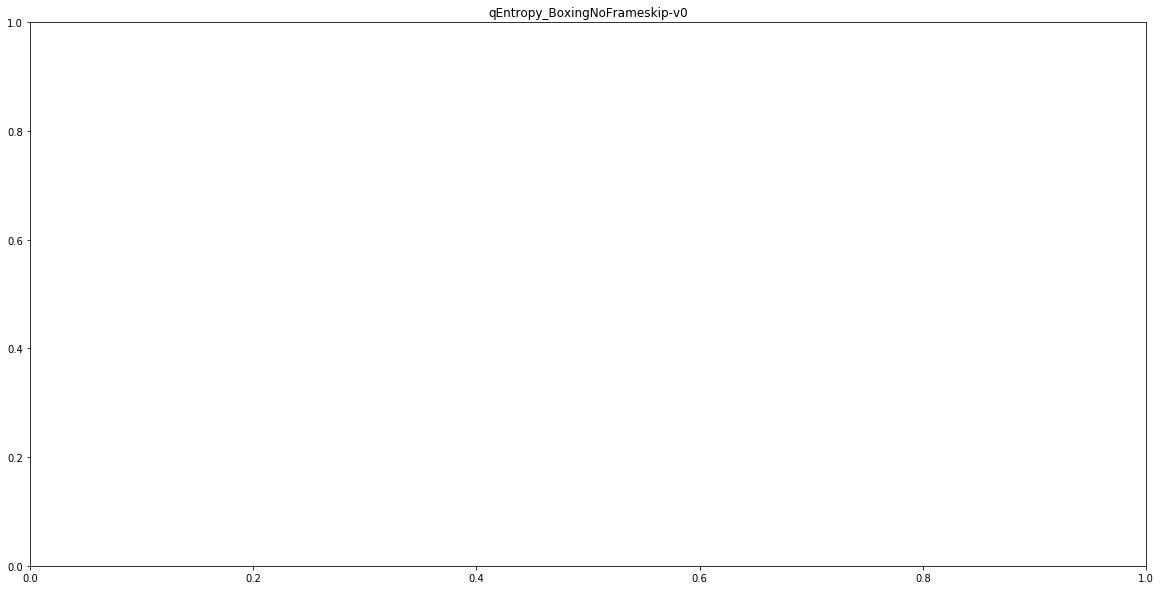

no path exists


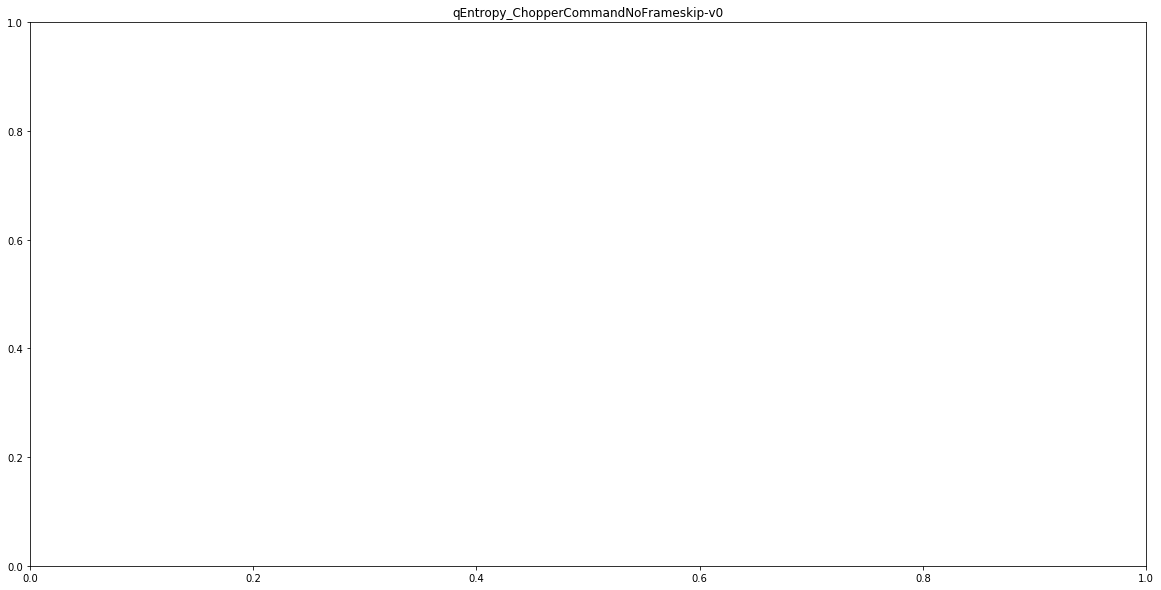

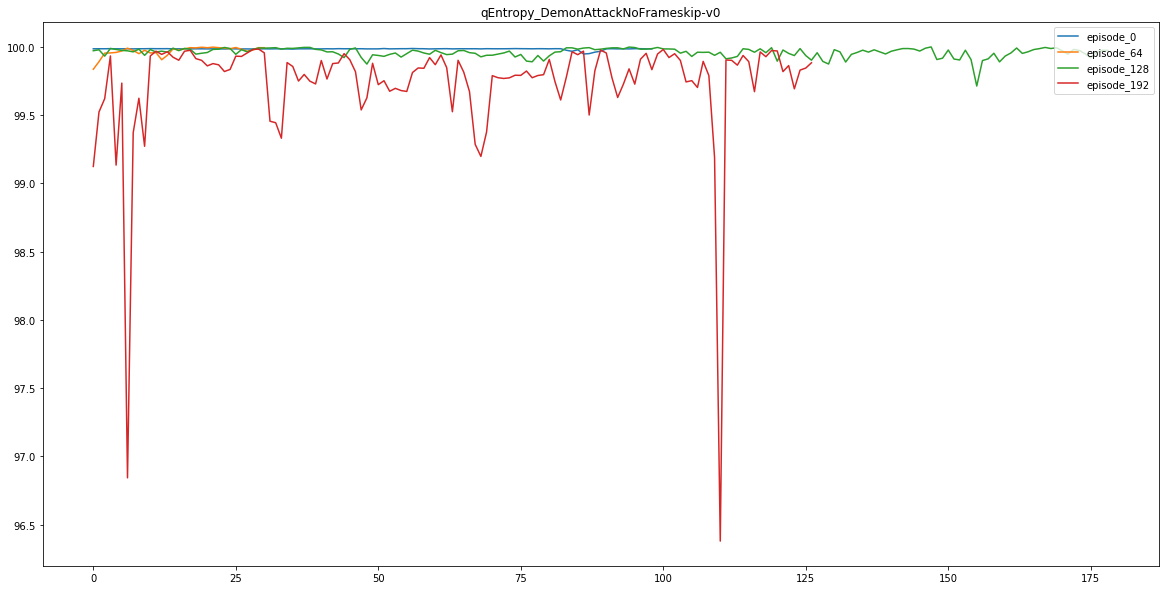

no path exists


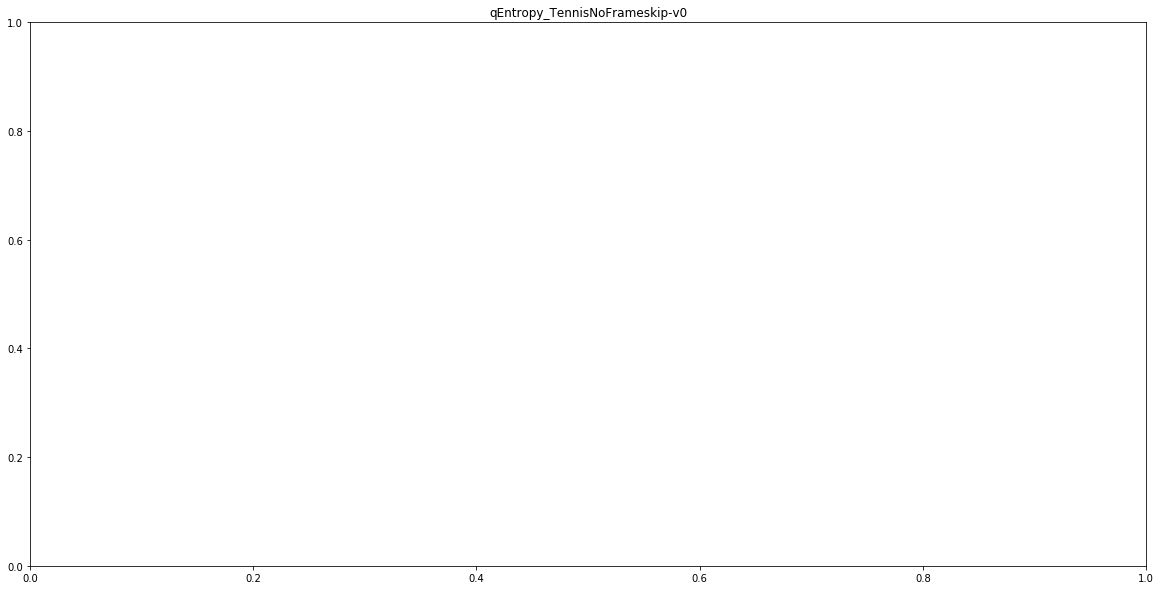

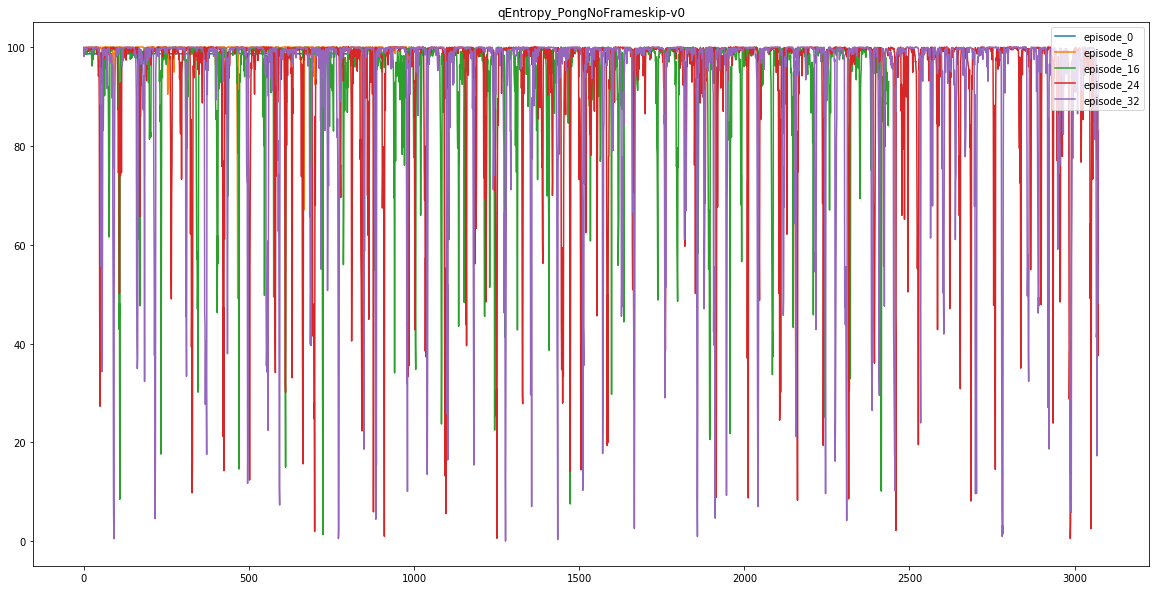

In [3]:
for d in dirs:
    for g in games:
        plt.figure(figsize=[20,10])
        q_entropy = get_value(d, g, entropy_tau, 'qentropy') 
        plot_qentropy(d, g, q_entropy) 
        plt.show()